In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import os
import csv
import sys

from collections import defaultdict, Counter

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

sb.set_style('darkgrid')
sb.set()

In [4]:
df = pd.read_csv("D:\Open Classroom\Datasets\Retail Store Sales\scanner_data.csv")
df.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,2017-01-02,2547,1,X52,0EM7L,1.0,3.13
1,2,2017-01-02,822,2,2ML,68BRQ,1.0,5.46
2,3,2017-01-02,3686,3,0H2,CZUZX,1.0,6.35
3,4,2017-01-02,3719,4,0H2,549KK,1.0,5.59
4,5,2017-01-02,9200,5,0H2,K8EHH,1.0,6.88


In [5]:
df.shape

(131706, 8)

In [6]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 7 columns):
Date              131706 non-null object
Customer_ID       131706 non-null int64
Transaction_ID    131706 non-null int64
SKU_Category      131706 non-null object
SKU               131706 non-null object
Quantity          131706 non-null float64
Sales_Amount      131706 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 7.0+ MB


In [8]:
df.describe().round()

,Customer_ID,Transaction_ID,Quantity,Sales_Amount
count,131706.0,131706.0,131706.0,131706.0
mean,12386.0,32390.0,1.0,12.0
std,6086.0,18710.0,4.0,19.0
min,1.0,1.0,0.0,0.0
25%,7349.0,16134.0,1.0,4.0
50%,13496.0,32620.0,1.0,7.0
75%,17306.0,48548.0,1.0,12.0
max,22625.0,64682.0,400.0,708.0


In [9]:
df.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,2017-01-02,2547,1,X52,0EM7L,1.0,3.13
1,2017-01-02,822,2,2ML,68BRQ,1.0,5.46
2,2017-01-02,3686,3,0H2,CZUZX,1.0,6.35
3,2017-01-02,3719,4,0H2,549KK,1.0,5.59
4,2017-01-02,9200,5,0H2,K8EHH,1.0,6.88


In [10]:
df['SKU'].value_counts()

UNJKW    2007
COWU2     791
OV1P9     737
M6J9W     698
C6TXL     689
         ... 
0USN8       1
8KDM4       1
N864E       1
A46UC       1
N5SN2       1
Name: SKU, Length: 5242, dtype: int64

In [24]:
count = 0
for i, x in enumerate(df['SKU'].unique()):
    count += 1
print(count)

5242


In [26]:
df['SKU'].value_counts()

UNJKW    2007
COWU2     791
OV1P9     737
M6J9W     698
C6TXL     689
         ... 
0USN8       1
8KDM4       1
N864E       1
A46UC       1
N5SN2       1
Name: SKU, Length: 5242, dtype: int64

In [35]:
df['Date'] = pd.to_datetime(df['Date'])

In [37]:
df['Sales'] = df['Quantity'] * df['Sales_Amount']

In [40]:
df.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Sales
0,2017-01-02,2547,1,X52,0EM7L,1.0,3.13,3.13
1,2017-01-02,822,2,2ML,68BRQ,1.0,5.46,5.46
2,2017-01-02,3686,3,0H2,CZUZX,1.0,6.35,6.35
3,2017-01-02,3719,4,0H2,549KK,1.0,5.59,5.59
4,2017-01-02,9200,5,0H2,K8EHH,1.0,6.88,6.88


In [43]:
df['Month'] = df['Date'].dt.month_name()
df.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Sales,Month
0,2017-01-02,2547,1,X52,0EM7L,1.0,3.13,3.13,January
1,2017-01-02,822,2,2ML,68BRQ,1.0,5.46,5.46,January
2,2017-01-02,3686,3,0H2,CZUZX,1.0,6.35,6.35,January
3,2017-01-02,3719,4,0H2,549KK,1.0,5.59,5.59,January
4,2017-01-02,9200,5,0H2,K8EHH,1.0,6.88,6.88,January


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

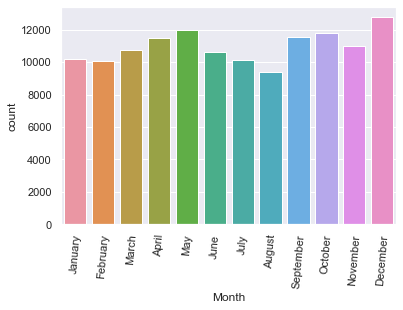

In [55]:
sb.countplot(df['Month'])
plt.xticks(rotation = 85)

Text(0.5, 1.0, 'Monthly Revenue vs Sales')

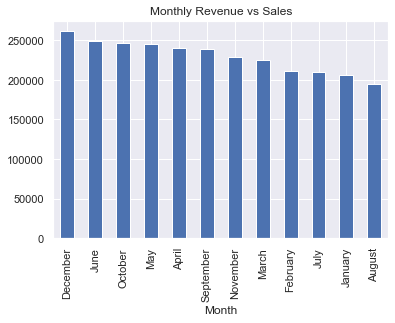

In [58]:
monthly = df.groupby(df['Month'])
monthly['Sales'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Monthly Revenue vs Sales')

In [ ]:
monthly = df['Sales'].resample('M')